In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
import numpy as np

2024-05-11 17:24:45.377117: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-11 17:24:45.377235: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-11 17:24:45.656575: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Set the paths to your 'dogs' and 'cats' TRAIN folders
DOG_TRAIN_PATH = '/kaggle/input/cat-or-dog-image-classification/Train/Dog'
CAT_TRAIN_PATH = '/kaggle/input/cat-or-dog-image-classification/Train/Cat'

# Set the paths to your 'dogs' and 'cats' TEST folders
DOG_TEST_PATH = '/kaggle/input/cat-or-dog-image-classification/Test/Dog'
CAT_TEST_PATH = '/kaggle/input/cat-or-dog-image-classification/Test/Cat'


In [3]:
import os

# Set the paths to your 'dogs' and 'cats' TRAIN folders
DOG_TRAIN_PATH = '/kaggle/input/cat-or-dog-image-classification/Train/Dog'
CAT_TRAIN_PATH = '/kaggle/input/cat-or-dog-image-classification/Train/Cat'

# Set the paths to your 'dogs' and 'cats' TEST folders
DOG_TEST_PATH = '/kaggle/input/cat-or-dog-image-classification/Test/Dog'
CAT_TEST_PATH = '/kaggle/input/cat-or-dog-image-classification/Test/Cat'

# Verify paths
print("Training paths:")
print("Dog:", DOG_TRAIN_PATH)
print("Cat:", CAT_TRAIN_PATH)
print("\nTesting paths:")
print("Dog:", DOG_TEST_PATH)
print("Cat:", CAT_TEST_PATH)

# Verify number of images in each directory
print("\nNumber of training images:")
print("Dog:", len(os.listdir(DOG_TRAIN_PATH)))
print("Cat:", len(os.listdir(CAT_TRAIN_PATH)))
print("\nNumber of testing images:")
print("Dog:", len(os.listdir(DOG_TEST_PATH)))
print("Cat:", len(os.listdir(CAT_TEST_PATH)))

Training paths:
Dog: /kaggle/input/cat-or-dog-image-classification/Train/Dog
Cat: /kaggle/input/cat-or-dog-image-classification/Train/Cat

Testing paths:
Dog: /kaggle/input/cat-or-dog-image-classification/Test/Dog
Cat: /kaggle/input/cat-or-dog-image-classification/Test/Cat

Number of training images:
Dog: 11827
Cat: 11823

Number of testing images:
Dog: 1919
Cat: 1944


In [4]:
from PIL import Image
import os
#function to get image shape
def get_image_shape_pil(directory):
 
    image_shapes = []
    for filename in os.listdir(directory):
        if filename.endswith((".jpg", ".png")):
            image_path = os.path.join(directory, filename)
            with Image.open(image_path) as img:
                image_shapes.append(img.size)
    return image_shapes

# Example usage:
# CAT_TRAIN_PATH = '/kaggle/input/cat-or-dog-image-classification/Train/Cat'
cat_train_shapes = get_image_shape_pil(CAT_TRAIN_PATH)
print("Shapes of cat images in the training dataset:", cat_train_shapes)


Shapes of cat images in the training dataset: [(349, 352), (500, 333), (500, 332), (500, 374), (500, 374), (337, 270), (499, 423), (499, 302), (320, 239), (499, 375), (300, 280), (389, 499), (231, 270), (500, 426), (273, 324), (499, 333), (411, 435), (399, 352), (500, 374), (447, 499), (134, 126), (211, 252), (466, 381), (499, 375), (350, 261), (320, 426), (229, 306), (487, 499), (217, 200), (199, 200), (499, 307), (500, 369), (397, 430), (499, 375), (480, 359), (390, 332), (360, 479), (499, 333), (251, 180), (500, 458), (287, 183), (368, 500), (500, 373), (480, 354), (319, 209), (500, 374), (398, 499), (500, 374), (500, 374), (500, 374), (299, 225), (499, 375), (500, 374), (499, 375), (479, 360), (334, 500), (447, 455), (336, 410), (349, 318), (500, 452), (350, 232), (319, 240), (368, 359), (421, 499), (162, 145), (431, 353), (288, 215), (499, 333), (476, 480), (499, 375), (499, 349), (294, 201), (471, 499), (374, 500), (319, 240), (200, 199), (500, 374), (320, 239), (499, 451), (499,

In [5]:
# CAT_TRAIN_PATH = '/kaggle/input/cat-or-dog-image-classification/Train/Cat'
dog_train_shapes = get_image_shape_pil(DOG_TRAIN_PATH)
print("Shapes of cat images in the training dataset:", dog_train_shapes)

Shapes of cat images in the training dataset: [(320, 239), (499, 359), (499, 333), (500, 499), (500, 367), (500, 387), (500, 499), (500, 413), (428, 500), (500, 374), (499, 331), (221, 377), (499, 375), (400, 330), (374, 500), (317, 380), (184, 138), (499, 343), (445, 480), (500, 331), (401, 499), (499, 375), (299, 225), (499, 375), (225, 367), (314, 499), (500, 428), (449, 338), (400, 301), (350, 299), (499, 375), (247, 240), (474, 411), (500, 329), (499, 333), (499, 492), (500, 374), (500, 332), (257, 391), (380, 341), (227, 182), (359, 248), (200, 181), (259, 269), (242, 414), (287, 250), (199, 189), (500, 374), (499, 375), (422, 252), (499, 375), (497, 500), (499, 456), (499, 492), (332, 500), (499, 381), (237, 303), (500, 374), (352, 287), (499, 373), (500, 374), (500, 332), (499, 375), (359, 270), (319, 240), (325, 324), (263, 412), (499, 375), (500, 332), (333, 499), (319, 269), (499, 375), (499, 375), (499, 375), (395, 399), (453, 387), (478, 267), (400, 399), (399, 300), (359,

In [6]:
import numpy as np

# Define the paths to the training data for cats and dogs
DOG_TRAIN_PATH = '/kaggle/input/cat-or-dog-image-classification/Train/Dog'
CAT_TRAIN_PATH = '/kaggle/input/cat-or-dog-image-classification/Train/Cat'

# Function to get file paths and labels from a directory
def get_files_and_labels(directory, label):
    file_paths = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_paths.append(os.path.join(directory, filename))
            labels.append(label)  # Assign label for each image
    return file_paths, labels

# Get file paths and labels for training data
dog_train_paths, dog_train_labels = get_files_and_labels(DOG_TRAIN_PATH, 1)  # Assign label 1 for dog
cat_train_paths, cat_train_labels = get_files_and_labels(CAT_TRAIN_PATH, 0)  # Assign label 0 for cat

# Combine file paths and labels for both cats and dogs
train_paths = dog_train_paths + cat_train_paths
train_labels = dog_train_labels + cat_train_labels

# Convert lists to numpy arrays
train_paths = np.array(train_paths)
train_labels = np.array(train_labels)

# Shuffle the data (if needed)
random_indices = np.random.permutation(len(train_paths))
train_paths = train_paths[random_indices]
train_labels = train_labels[random_indices]

# Check the combined dataset size
print("Combined Training Data Size:", len(train_paths))
 

Combined Training Data Size: 23650


In [7]:
for i in range(10):
    print("Path:", train_paths[i], "Label:", train_labels[i])

Path: /kaggle/input/cat-or-dog-image-classification/Train/Cat/cat.5648.jpg Label: 0
Path: /kaggle/input/cat-or-dog-image-classification/Train/Cat/cat.6837.jpg Label: 0
Path: /kaggle/input/cat-or-dog-image-classification/Train/Cat/cat.2917.jpg Label: 0
Path: /kaggle/input/cat-or-dog-image-classification/Train/Dog/dog.1398.jpg Label: 1
Path: /kaggle/input/cat-or-dog-image-classification/Train/Cat/cat.4705.jpg Label: 0
Path: /kaggle/input/cat-or-dog-image-classification/Train/Dog/dog.6304.jpg Label: 1
Path: /kaggle/input/cat-or-dog-image-classification/Train/Cat/cat.3720.jpg Label: 0
Path: /kaggle/input/cat-or-dog-image-classification/Train/Dog/dog.5635.jpg Label: 1
Path: /kaggle/input/cat-or-dog-image-classification/Train/Cat/cat.8003.jpg Label: 0
Path: /kaggle/input/cat-or-dog-image-classification/Train/Dog/dog.1505.jpg Label: 1


In [8]:
# Define the paths to the testing data for cats and dogs
DOG_TEST_PATH = '/kaggle/input/cat-or-dog-image-classification/Test/Dog'
CAT_TEST_PATH = '/kaggle/input/cat-or-dog-image-classification/Test/Cat'

# Get file paths and labels for testing data
dog_test_paths, dog_test_labels = get_files_and_labels(DOG_TEST_PATH, 1)  # Assign label 1 for dog
cat_test_paths, cat_test_labels = get_files_and_labels(CAT_TEST_PATH, 0)  # Assign label 0 for cat

# Combine file paths and labels for both cats and dogs
test_paths = dog_test_paths + cat_test_paths
test_labels = dog_test_labels + cat_test_labels

# Convert lists to numpy arrays
test_paths = np.array(test_paths)
test_labels = np.array(test_labels)

# Shuffle the data (if needed)
random_indices = np.random.permutation(len(test_paths))
test_paths = test_paths[random_indices]
test_labels = test_labels[random_indices]

# Check the combined dataset size
print("Combined Testing Data Size:", len(test_paths))

# Print the first 10 paths and their corresponding labels from the combined testing dataset
for i in range(10):
    print("Path:", test_paths[i], "Label:", test_labels[i])

Combined Testing Data Size: 3863
Path: /kaggle/input/cat-or-dog-image-classification/Test/Cat/cat.597.jpg Label: 0
Path: /kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.4484.jpg Label: 1
Path: /kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.8258.jpg Label: 1
Path: /kaggle/input/cat-or-dog-image-classification/Test/Cat/cat.4346.jpg Label: 0
Path: /kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.1831.jpg Label: 1
Path: /kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.867.jpg Label: 1
Path: /kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.4634.jpg Label: 1
Path: /kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.4544.jpg Label: 1
Path: /kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.12010.jpg Label: 1
Path: /kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.4598.jpg Label: 1


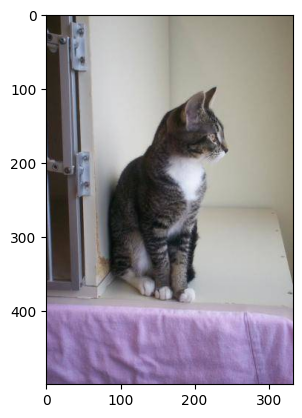

In [9]:
import random 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
id_train = random.randint(0,len(train_paths))
img = mpimg.imread(train_paths[id_train])
# img = mpimg.imread('/kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.10661.jpg')
imgplt = plt.imshow(img)
# plt.imshow()

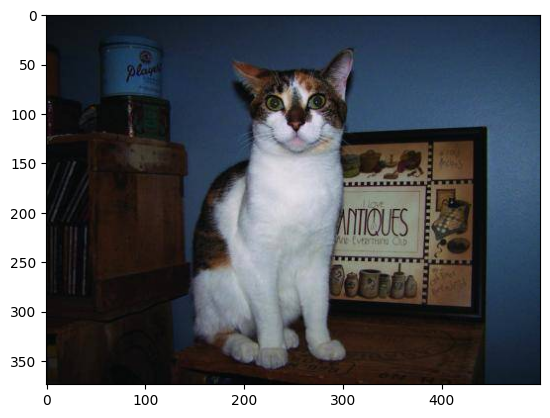

In [10]:
id_train = random.randint(0,len(test_paths))
img = mpimg.imread(test_paths[id_train])
imgplt = plt.imshow(img)

Resizing Images
currently I am taking 150 x 150 as image size


In [11]:
import tensorflow as tf

def preprocess_and_resize_images(image_paths, labels, target_size):
    """
    Preprocesses and resizes a batch of images.

    Args:
    - image_paths: List of file paths to the images.
    - labels: List of labels corresponding to the images.
    - target_size: Tuple specifying the target size for the images (height, width).

    Returns:
    - A tuple containing preprocessed and resized images and their labels.
    """
    images = []
    for path in image_paths:
        img = tf.io.read_file(path)
        img = tf.image.decode_jpeg(img, channels=3)  # Decode JPEG image with 3 channels (RGB)
        img = tf.image.resize(img, target_size)
        images.append(img)
    images = tf.stack(images)
    return images.numpy(), labels

# Define the target size for resizing
target_size = (150, 150)

# Preprocess and resize the images in the combined testing dataset
train_images_resized,train_labels_resized = preprocess_and_resize_images(train_paths, train_labels, target_size)
test_images_resized, test_labels_resized = preprocess_and_resize_images(test_paths, test_labels, target_size)




In [12]:
# Check the shape of the resized images array


train_labels = train_labels.reshape(len(train_labels),1)
test_labels = test_labels.reshape(len(test_labels),1)
                                   
print("Resized Train Images Shape:", train_images_resized.shape)
print("train label:", train_labels.shape)
print("Resized Test Images Shape:", test_images_resized.shape)
print("Train label Shape:", test_labels.shape)

Resized Train Images Shape: (23650, 150, 150, 3)
train label: (23650, 1)
Resized Test Images Shape: (3863, 150, 150, 3)
Train label Shape: (3863, 1)


In [13]:
train_images_resized[1,:]

array([[[6.2277779e+01, 2.8277777e+01, 6.1111104e-01],
        [6.1083332e+01, 2.7083334e+01, 8.3333337e-01],
        [6.0611111e+01, 2.6611111e+01, 2.0277770e+00],
        ...,
        [3.5583344e+01, 1.9583344e+01, 4.5833435e+00],
        [3.3166668e+01, 1.7166666e+01, 2.1666667e+00],
        [3.3638977e+01, 1.7638977e+01, 2.7500610e+00]],

       [[6.0333332e+01, 2.6333334e+01, 1.6666675e-01],
        [6.1750000e+01, 2.7750000e+01, 1.5000000e+00],
        [7.0000000e+01, 3.6000000e+01, 1.1000000e+01],
        ...,
        [3.7583344e+01, 2.1583344e+01, 6.5833435e+00],
        [3.5000000e+01, 1.9000000e+01, 4.0000000e+00],
        [3.5750061e+01, 1.9750061e+01, 4.7500610e+00]],

       [[5.8972221e+01, 2.8638887e+01, 1.3055543e+00],
        [6.9416664e+01, 3.8833332e+01, 1.0500000e+01],
        [6.4000008e+01, 3.2666668e+01, 7.3333359e+00],
        ...,
        [4.0305573e+01, 2.3305573e+01, 7.3055725e+00],
        [3.8333332e+01, 2.1333332e+01, 5.3333330e+00],
        [3.9250019e+01

Normalization by dividing by 255

In [14]:
train_images_resized = train_images_resized/255
test_images_resized = test_images_resized/255

In [15]:
model  = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) adds a 2D convolutional layer with the following properties:
32 filters: This layer learns 32 filters, which are small matrices used to extract features from the input image.
Kernel size (3, 3): The filters have a size of 3x3 pixels, which will slide across the input image to learn local features.
ReLU activation: The rectified linear unit (ReLU) activation function introduces non-linearity, allowing the layer to learn more complex patterns.
Input shape (100, 100, 3): This specifies the expected dimensions of the input images: 100x100 pixels with 3 color channels (RGB).
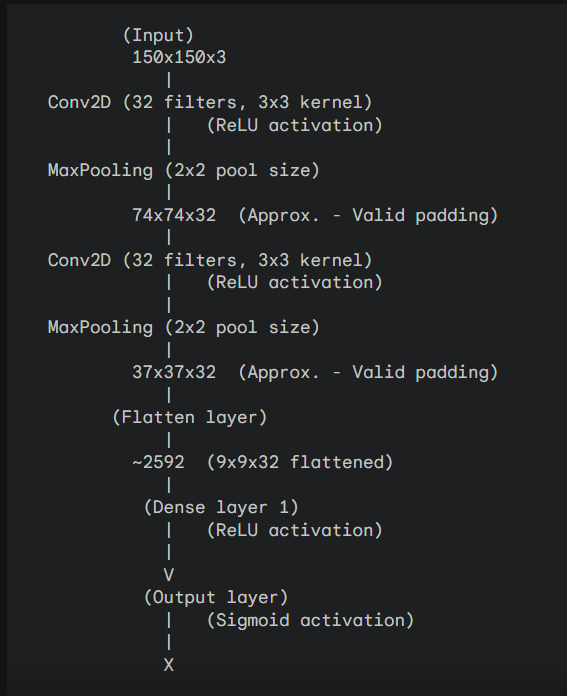]

model.add(MaxPooling2D((2, 2))) adds a max pooling layer with a pool size of 2x2. This layer downsamples the output of the previous layer by taking the maximum value from each 2x2 region, reducing the spatial dimensions of the data.

In [16]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [17]:
model.fit(train_images_resized,train_labels,epochs = 10,batch_size = 64)

Epoch 1/10
  7/370 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.4884 - loss: 1.5902

I0000 00:00:1715448606.195500      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715448606.216709      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


370/370 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5995 - loss: 0.7087
Epoch 2/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.7449 - loss: 0.5166
Epoch 3/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.7928 - loss: 0.4390
Epoch 4/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8250 - loss: 0.3888
Epoch 5/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8466 - loss: 0.3444
Epoch 6/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8670 - loss: 0.3082
Epoch 7/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8795 - loss: 0.2796
Epoch 8/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9025 - loss: 0.2300
Epoch 9/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9160 - loss: 0.1989
Epoch 10/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9307 - loss: 0.1669


In [18]:
model.fit(train_images_resized,train_labels,epochs = 1,batch_size = 64)

370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9485 - loss: 0.1284


making predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
[[0.60321605]]
dog


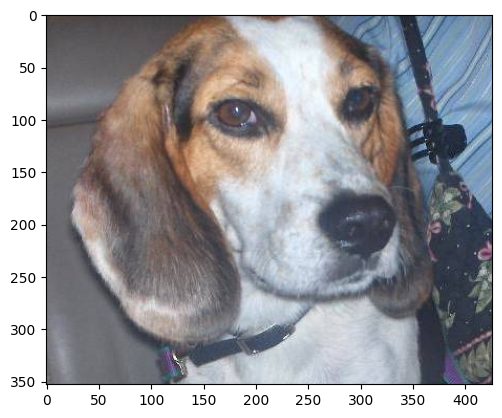

In [19]:
id_predict = random.randint(0,len(test_paths))
 
img = mpimg.imread(test_paths[id_predict])
# img = mpimg.imread('/kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.10661.jpg')
imgplt = plt.imshow(img)
y_pred = model.predict(test_images_resized[id_predict].reshape(1,150,150,3))
print(y_pred)
output = "dog" if y_pred >0.5 else "cat"
print(output)

In [20]:
model.save('simple_cnn_cat_dog1.h5')